# Visualise Metric CSV

In [2]:
import csv
import matplotlib.pyplot as plt
import numpy as np

## Ave Task Accuracy

### Path

In [6]:
# Finetuning_1 multi

csv_path_list = ["../../logs_saved/summary/Finetuning_1/runs/1/csv/test_metrics.csv",
                 "../../logs_saved/summary/Finetuning_1/runs/2/csv/test_metrics.csv",
                 "../../logs_saved/summary/Finetuning_1/runs/3/csv/test_metrics.csv",
                 "../../logs_saved/summary/Finetuning_1/runs/4/csv/test_metrics.csv",
                 "../../logs_saved/summary/Finetuning_1/runs/5/csv/test_metrics.csv",
                 "../../logs_saved/summary/Finetuning_1/runs/6/csv/test_metrics.csv",
                 "../../logs_saved/summary/Finetuning_1/runs/7/csv/test_metrics.csv",
                 "../../logs_saved/summary/Finetuning_1/runs/8/csv/test_metrics.csv",
                 "../../logs_saved/summary/Finetuning_1/runs/9/csv/test_metrics.csv",
                 "../../logs_saved/summary/Finetuning_1/runs/10/csv/test_metrics.csv",
                 "../../logs_saved/summary/Finetuning_1/runs/10/csv/test_metrics.csv",
]
legend_list = ["run 1", "run 2", "run 3", "run 4", "run 5", "run 6", "run 7", "run 8", "run 9", "run 10"]

In [25]:
# Baseline
# task acc

csv_path_list = ["../../logs_saved/summary/HAT_1/runs/1/csv/test_metrics.csv",
                 "../../logs_saved/summary/Finetuning_1/runs/13/csv/test_metrics.csv",
                 "../../logs_saved/summary/EWC_1/runs/1/csv/test_metrics.csv",
                 "../../logs_saved/summary/LwF_1/runs/1/csv/test_metrics.csv",
                 "../../logs_saved/summary/AdaHAT_1/runs/2_ada/csv/test_metrics.csv"
]
legend_list = ["HAT","Finetuning", "EWC", "LwF", "AdaHAT"]
y_label = "Average Classification Accuracy (Over Tasks)"



## Plot average task accuracy

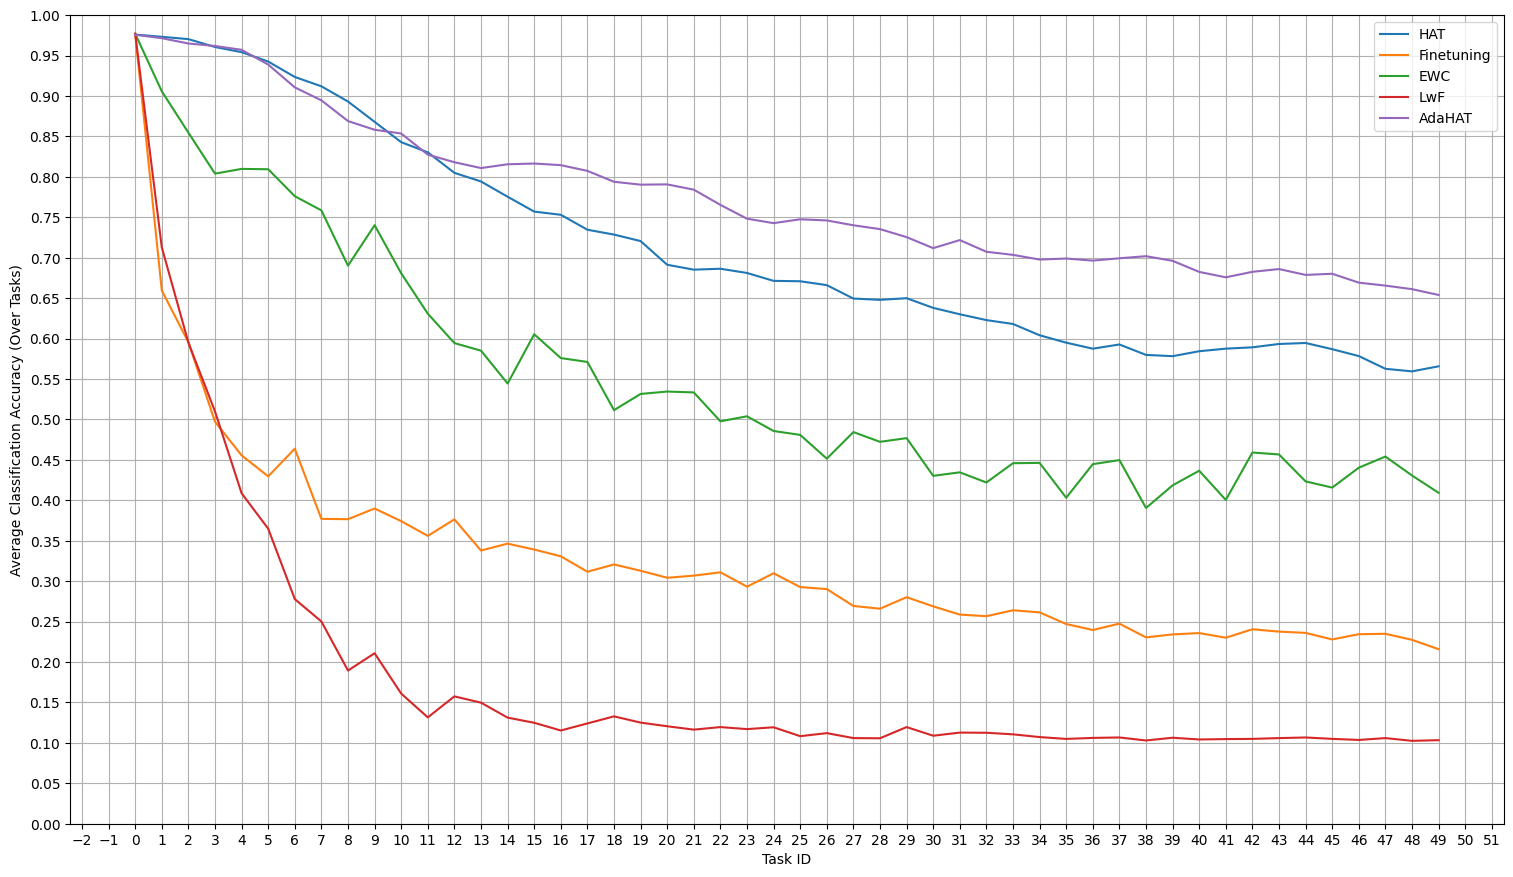

In [26]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

# global settings
ax.grid(True)
ax.set_title("")
ax.set_xlabel("Task ID")
ax.set_ylabel(y_label)
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.set_ylim(0,1)
ax.yaxis.set_major_locator(plt.MultipleLocator(0.05))


for csv_path, legend in zip(csv_path_list, legend_list):
    
    # read csv
    with open(csv_path) as csvfile:
        reader = csv.DictReader(csvfile)
        task_column = [int(row["task"]) for row in reader]

    with open(csv_path) as csvfile:   
        reader = csv.DictReader(csvfile)
        ave_acc_column = [float(row['test/acc/ave']) for row in reader]
        
    # plot
    ax.plot(task_column, ave_acc_column, label=legend)
    ax.legend()
    
    



plt.show()


## Plot average forgetting ratio

### Path


In [27]:
# Baseline
# fr


csv_path_list = ["../../logs_saved/summary/HAT_1/runs/1/csv/test_forgetting_ratio.csv",
                 "../../logs_saved/summary/Finetuning_1/runs/13/csv/test_forgetting_ratio.csv",
                 "../../logs_saved/summary/EWC_1/runs/1/csv/test_forgetting_ratio.csv",
                 "../../logs_saved/summary/LwF_1/runs/1/csv/test_forgetting_ratio.csv",
                 "../../logs_saved/summary/AdaHAT_1/runs/2_ada/csv/test_forgetting_ratio.csv"
]
legend_list = ["HAT","Finetuning", "EWC", "LwF", "AdaHAT"]
y_label = "Average Classification Forgetting Ratio (Over Tasks)"


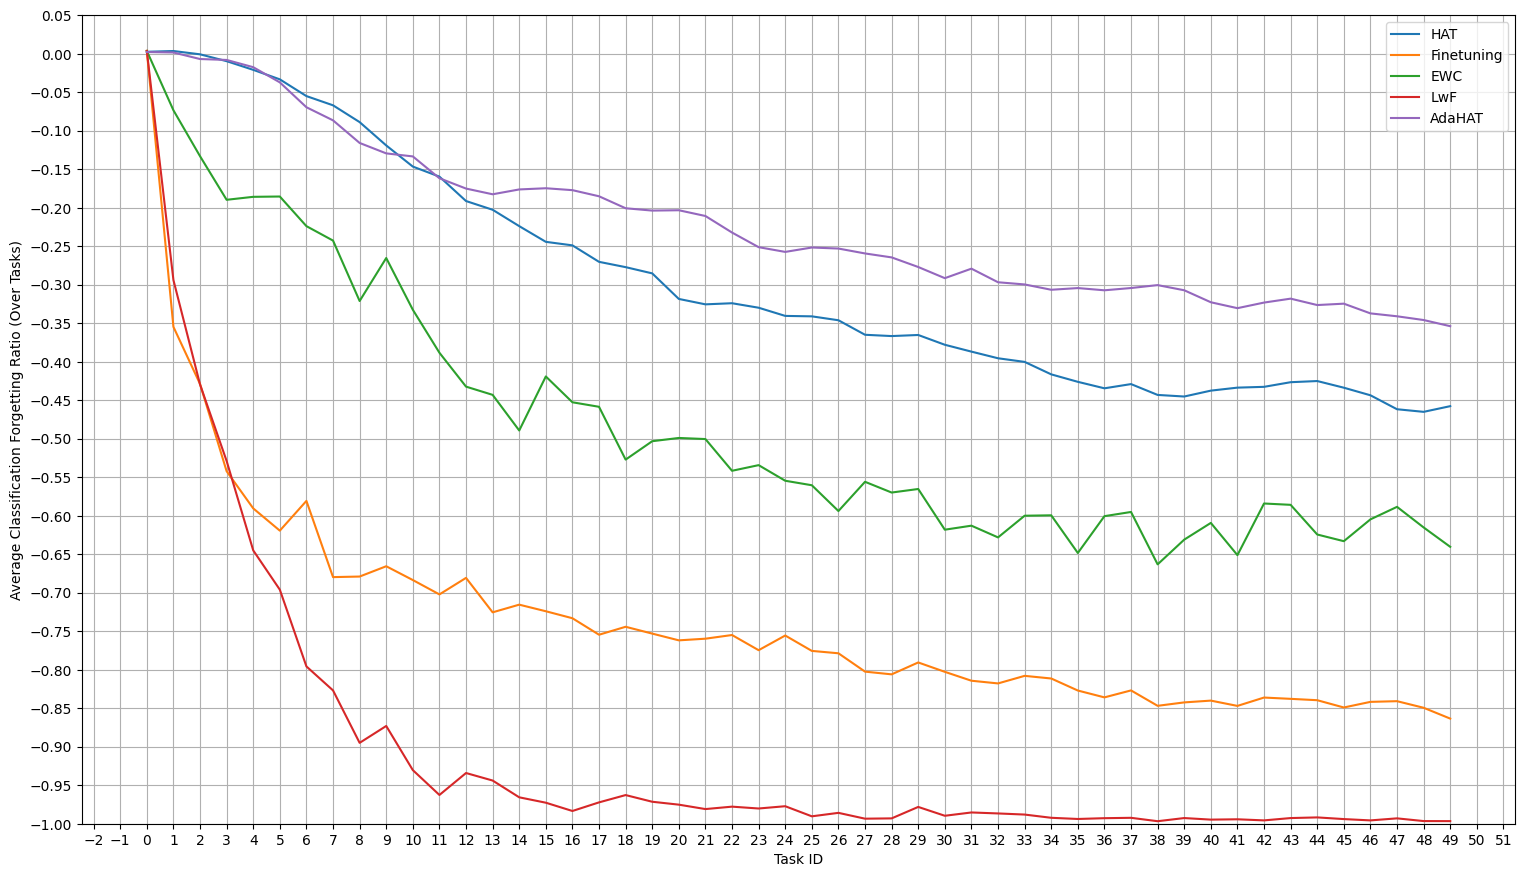

In [29]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)


# global settings
ax.grid(True)
ax.set_title("")
ax.set_xlabel("Task ID")
ax.set_ylabel(y_label)
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.set_ylim(-1,0.05)
ax.yaxis.set_major_locator(plt.MultipleLocator(0.05))


for csv_path, legend in zip(csv_path_list, legend_list):
    
    # read csv
    with open(csv_path) as csvfile:
        reader = csv.DictReader(csvfile)
        task_column = [int(row["task"]) for row in reader]

    with open(csv_path) as csvfile:   
        reader = csv.DictReader(csvfile)
        ave_acc_column = [float(row['test/fr/ave']) for row in reader]
        
    # plot
    ax.plot(task_column, ave_acc_column, label=legend)
    ax.legend()
    
    



plt.show()
